# Integrating the HFM library into pyKasso #
C. Fandel 2020 <br>
Purpose: replace the skfmm module with the agd-hfm module to improve network generation capability

TO-DO:

*Necessary*
- [X] add cost map
- [X] make cost map reflect realistic values
- [X] add DxV and DyV (x and y components of gradient in each cell of array)
    - [X] option to calculate from DEM
        - [X] rotate DEM csv by 90 degrees
    - [ ] option to import from GSLIB file
- [X] add alpha map (travel cost in same direction as gradient)
- [X] add beta map (travel cost perpendicular to gradient)
- [X] convert cost map into HFM library's input format
- [ ] use the HFM library to compute travel time map and paths
- [ ] convert paths to node/link format

*Useful*
- [ ] label geology colorbar so we know which colors correspond to karstifiable units
    - function to edit: show_catchment()
- [ ] add update_cost() function
- [ ] replace all code_ functions with cost_ functions
- [ ] add to get, set, and show functions
    - [ ] topography





### Setup & imports ###
Need to import a local version of pykasso be able to make and test changes.
Use one of the two methods below (but not both).
Question: Is one way better than the other in some way?

In [8]:
method = 2

#Method 1: using importlib
if method==1:
    import importlib.util
    spec = importlib.util.spec_from_file_location('pykasso', 'C:/Users/Chloe/Documents/GitHub/pyKasso/pykasso/base.py')
    pk = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(pk)

#Method 2: setting the path variable to the path to the local version 
#This version allows reloading the module to see changes
if method==2:
    import sys
    sys.path.append('C:/Users/Chloe/Documents/GitHub/pyKasso/pykasso') #path to local version of package
    import base as pk  #in this case, "base" is the name of the .py file with all of the pykasso functions in it

#Check that it worked:
#catchment = pk.SKS() #create a simple model
#You should see a printed statement indicating that you are using a development version of the package.
#If you do not see this statement, you are using the main version, and changes you make to the local version will have no effect.


In [9]:
#Import the rest of the modules needed:
import os            
import sys           
import importlib
import numpy as np
from matplotlib import pyplot as plt
import agd


### Set up a simple one-valley system ###

CAUTION: You are using the development version of this package.


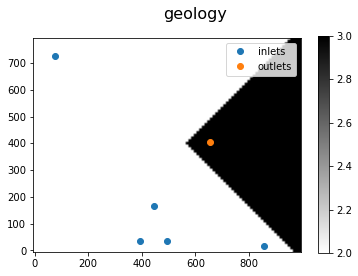

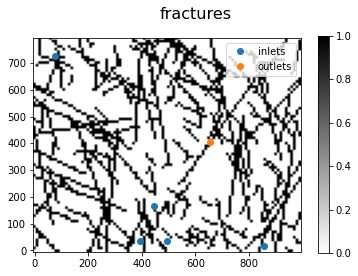

changes have been made

 This network contains  2  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


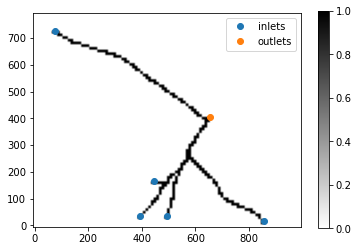

In [32]:
importlib.reload(pk)

catchment = pk.SKS('inputs/valley1/options.yaml', rand_seed=1) #import settings and options from input folder
catchment.show_catchment(data='geology')
catchment.show_catchment(data='fractures')
catchment.compute_karst_network()
catchment.show()

#### Original and recommended settings ####
*Velocity:* higher for easier-to-traverse fm like aquifer <br>
*Cost:* lower for easier-to-traverse fm like aquifer <br>

**Values used in HFM (for cost):**<br>
```
Ckarst          = 0.2    #travel cost in karstifiable unit (should be low)
Cnonkarst       = 0.6    #travel cost in nonkarst unit (should be high)
Cfracture       = 0.05   #travel cost in fractures
Cconduit        = 0.1    #travel cost in conduits (should be low)
Cobstacle       = 0.8    #travel cost through obstacles (should be high)
Cout            = 0.999  #travel cost in areas outside model bound (should be very high)
```
**Original values (for velocity):**
```
code aquifere   = 2 
code aquiclude  = 1 
code faults     = 4 
code fractures  = 3
code conduits   = 5 
code out        = 0.1 
```

In [34]:
catchment.riemannMetric

Riemann(array([[[[  0.34,   0.34,   0.34, ...,   3.06,   3.06,   3.06],
         [ 76.5 ,   0.34,   0.34, ...,   3.06,   3.06,   3.06],
         [  0.34,  76.5 ,   0.34, ...,   3.06,   3.06,   3.06],
         ...,
         [  0.34,   0.34,  76.5 , ...,   3.06,   3.06,  76.5 ],
         [  0.34,   0.34,  76.5 , ...,   3.06,   3.06,  76.5 ],
         [  0.34,   0.34,  76.5 , ...,   3.06,   3.06,   3.06]],

        [[ -0.3 ,  -0.3 ,  -0.3 , ...,  -2.7 ,  -2.7 ,  -2.7 ],
         [-67.5 ,  -0.3 ,  -0.3 , ...,  -2.7 ,  -2.7 ,  -2.7 ],
         [ -0.3 , -67.5 ,  -0.3 , ...,  -2.7 ,  -2.7 ,  -2.7 ],
         ...,
         [  0.3 ,   0.3 ,  67.5 , ...,   2.7 ,   2.7 ,  67.5 ],
         [  0.3 ,   0.3 ,  67.5 , ...,   2.7 ,   2.7 ,  67.5 ],
         [  0.3 ,   0.3 ,  67.5 , ...,   2.7 ,   2.7 ,   2.7 ]]],


       [[[ -0.3 ,  -0.3 ,  -0.3 , ...,  -2.7 ,  -2.7 ,  -2.7 ],
         [-67.5 ,  -0.3 ,  -0.3 , ...,  -2.7 ,  -2.7 ,  -2.7 ],
         [ -0.3 , -67.5 ,  -0.3 , ...,  -2.7 ,  -2.7 ,  -2.7 ]

In [33]:
#View settings:
print('geology id',       catchment.get_geology_id())
print('geology velocity', catchment.get_geology_velocity())
print('geology cost',     catchment.get_geology_cost())
print('\ncode aquifere\t',    catchment.get_code_aquifere(),
      '\ncode aquiclude\t',   catchment.get_code_aquiclude(),
      '\ncode faults\t',      catchment.get_code_faults(),
      '\ncode fractures\t',   catchment.get_code_fractures(),
      '\ncode conduits\t',    catchment.get_code_conduits(),
      '\ncode out\t',         catchment.get_code_out())
catchment.settings

geology id [2, 3]
geology velocity [2, 1]
geology cost [0.2, 0.6]

code aquifere	 2 
code aquiclude	 1 
code faults	 4 
code fractures	 3 
code conduits	 5 
code out	 0.1


{'x0': 0,
 'y0': 0,
 'xnum': 100,
 'ynum': 80,
 'dx': 10,
 'dy': 10,
 'data_has_polygon': False,
 'polygon_data': 'inputs/polygon.txt',
 'inlets_mode': 'import',
 'inlets_data': 'inputs/valley1/inlets.csv',
 'inlets_number': 1,
 'outlets_mode': 'import',
 'outlets_data': 'inputs/valley1/outlets.csv',
 'outlets_number': 1,
 'geological_mode': 'import',
 'geological_datafile': 'inputs/valley1/geology2D.gslib',
 'topography_mode': 'csv',
 'topography_datafile': 'inputs/valley1/dem.csv',
 'orientation_mode': 'topo',
 'faults_mode': 'null',
 'faults_datafile': 'inputs/faults.gslib',
 'fractures_mode': 'random',
 'fractures_datafile': 'inputs/fractures.gslib',
 'fractures_densities': [5.83e-05,
  1.38e-05,
  2.22e-05,
  2.5e-05,
  4.16e-05,
  6.66e-05,
  '5e-5'],
 'fractures_min_orientation': [0, 15, 30, 60, 105, 120, 150],
 'fractures_max_orientation': [15, 30, 45, 105, 120, 150, 180],
 'fractures_alpha': 2,
 'fractures_min_length': 50,
 'fractures_max_length': 800,
 'code_out': 0.1,
 'code

### Inputs/outputs for fast-marching ###
For compute_time_map() using skfmm: <br>
```
self.maps['time'][iteration] = skfmm.travel_time(self.maps['phi'], self.maps['velocity'][iteration], dx=self.grid.dx, order=2)
```
- phi map - where the travel time=0, i.e. the target location(s) for the base level (and springs?) (array of 0s and 1s of dim (xres,yres))
    - from compute_phi_map(), needs:
        - outlets
- velocity map - how easy it is to travel through each cell (array of dim (xres,yres), larger values=easier to travel through) 
    - from compute_velocity_map(), needs:
       - code_aquifere
       - code_aquiclude
       - code_out
- dx - cell length in each dimension (array: [dx,dy])
- order - 1 or 2 (default), order of computational stencil to use in updating points (?)

For agd-hfm: <br>
```
hfmIn = Eikonal.dictIn({
    'model':             'Riemann3', #three-dimensional Riemannian eikonal equation (for 2D: Riemann2, for isotropic: Isotropic2 or 3)
    'order':              2,         #recommended setting: 2
    'exportValues':       1,         #output travel time field
    'exportGeodesicFlow': 1          #output walker paths
})
hfmIn.SetRect(sides=[[xmin,xmax],[ymin,ymax],[zmin,zmax]],dims=[xres,yres,zres])
for seed in springs:
    hfmIn['seed'] = seed
    for tip in tips:
        hfmIn['tips'] = [tip]
        hfmIn['metric']    =  F
        hfmOut = hfmIn.Run()
        paths = hfmOut['geodesics']
``` 
       
- seed - coordinates of travel time=0 location, i.e. the spring the conduits are traveling to (array of [x y z])
- tips - coordinates of starting points for walkers, i.e. the inlets (array of [[x1 y1 z1] [x2 y2 z2]]
- metric - travel cost through each cell, i.e. the inverse of the velocity (array of cost values, higher=slower to travel through). If using anisotropic FM, this will include travel cost both parallel and perpendicular to the cell's gradient.
    - to calculate travel cost metric, need:
        - DxV,DyV,DzV: x and y components of gradient in each cell of array, calculate from DEM or from geologic model orientations in each cell (arrays of dim (xres,yres)).
        - alpha: travel cost in same direction as gradient (array of dim (xres,yres) of values between 0 and 1, higher=slower)
        - beta: travel cost perpendicular to gradient (same format as alpha)
- model - which fast-marching algorithm to use (string, either Riemann2, Riemann3, Isotropic2, Isotropic3).

